In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reding data
realData = pd.read_csv("Virat_Kohli_ODI.csv")

In [3]:
# print few data
realData.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [22]:
realData["Runs"] = realData["Runs"].str.replace("*", "")
realData["Runs"] = realData["Runs"].astype(int)
realData["Runs"]

/tmp/ipykernel_35100/4185231186.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  realData["Runs"] = realData["Runs"].str.replace("*", "")


0       12
1       37
2       25
3       54
4       31
      ... 
127     45
128     65
129    122
130      8
131     55
Name: Runs, Length: 132, dtype: int64

In [27]:
# Calculate total outs
outs = realData["Dismissal"].isin(['lbw', 'caught', 'run out', 'bowled', 'stumped',
       'hit wicket'])
total_outs = outs.sum()
total_outs

115

In [23]:
#total run
total_runs = realData["Runs"].sum()
total_runs

6184

In [28]:
#avarage
batting_average = round(total_runs / total_outs, 2)
batting_average

53.77

In [4]:
# print the columns
print(realData.columns)

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')


In [5]:
# describe the dataset
realData.describe()

,BF,4s,6s,Pos,Inns
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,50.871212,4.371212,0.545455,3.303030,1.575758
std,38.729716,4.404032,1.086795,0.873174,0.496110
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,17.750000,1.000000,0.000000,3.000000,1.000000
50%,42.500000,3.000000,0.000000,3.000000,2.000000
75%,82.250000,7.000000,1.000000,4.000000,2.000000
max,140.000000,18.000000,7.000000,7.000000,2.000000


In [17]:
# highest run score
realData[realData['Runs'] == realData['Runs'].max()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
88,99,159,100,9,0,99,3,caught,1,v West Indies,Visakhapatnam,24-Nov-13


/tmp/ipykernel_35100/3582750584.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs_per_ground_df = realData.groupby("Ground").sum()


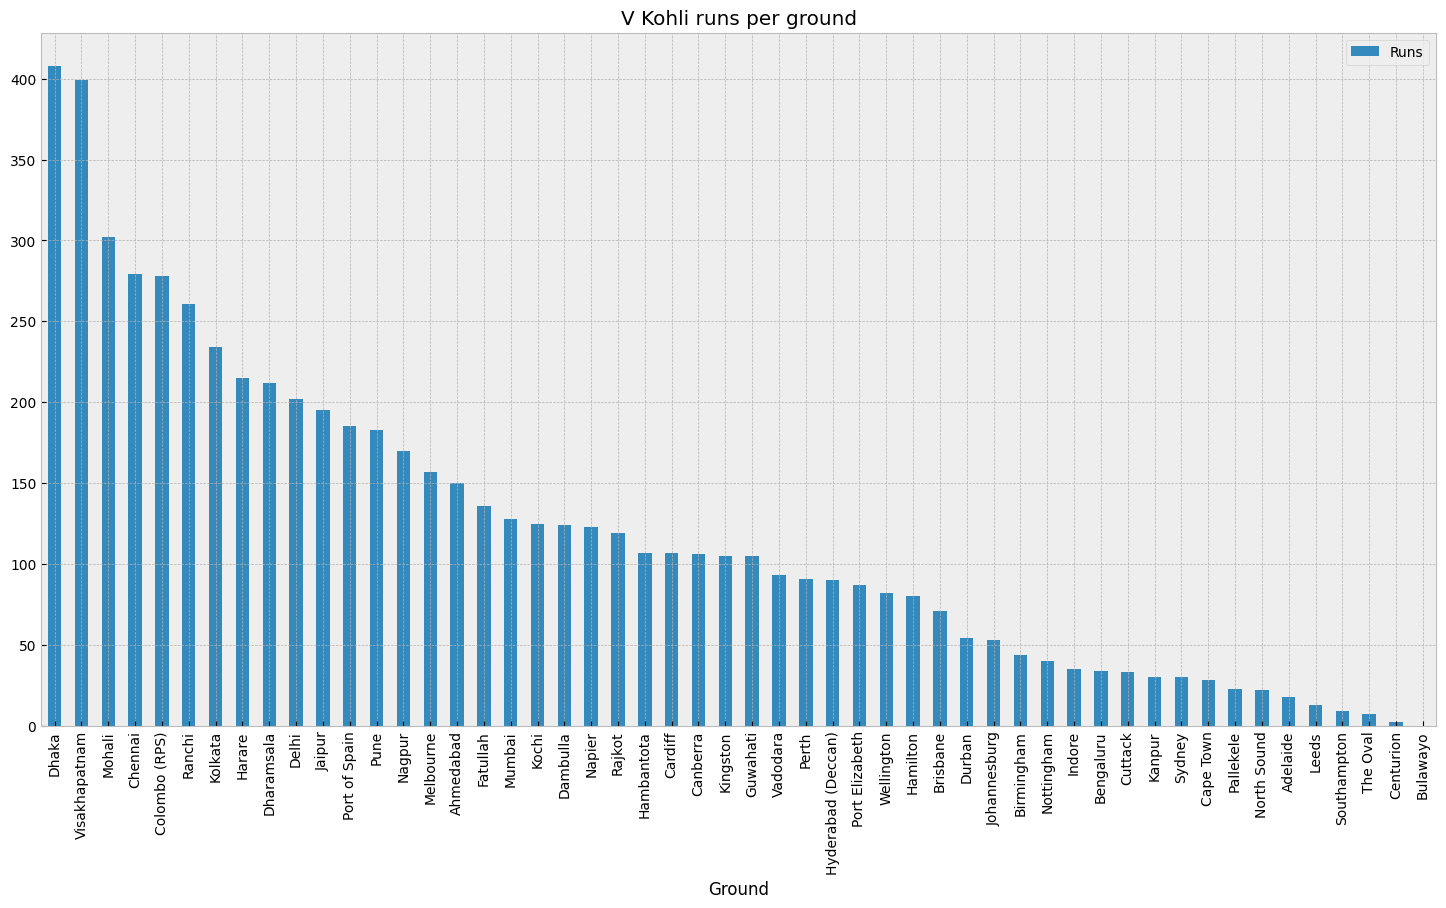

In [30]:
#runs per ground
import matplotlib.style
import matplotlib.pyplot as plt


runs_per_ground_df = realData.groupby("Ground").sum()
runs_per_ground_df = runs_per_ground_df.sort_values(by="Runs", ascending = False)
runs_per_ground_df.plot(figsize = (18,9), kind = "bar", y = "Runs")


plt.title("V Kohli runs per ground")
plt.show()

/tmp/ipykernel_35100/166947099.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Dismissal_df = realData.groupby("Dismissal").sum()


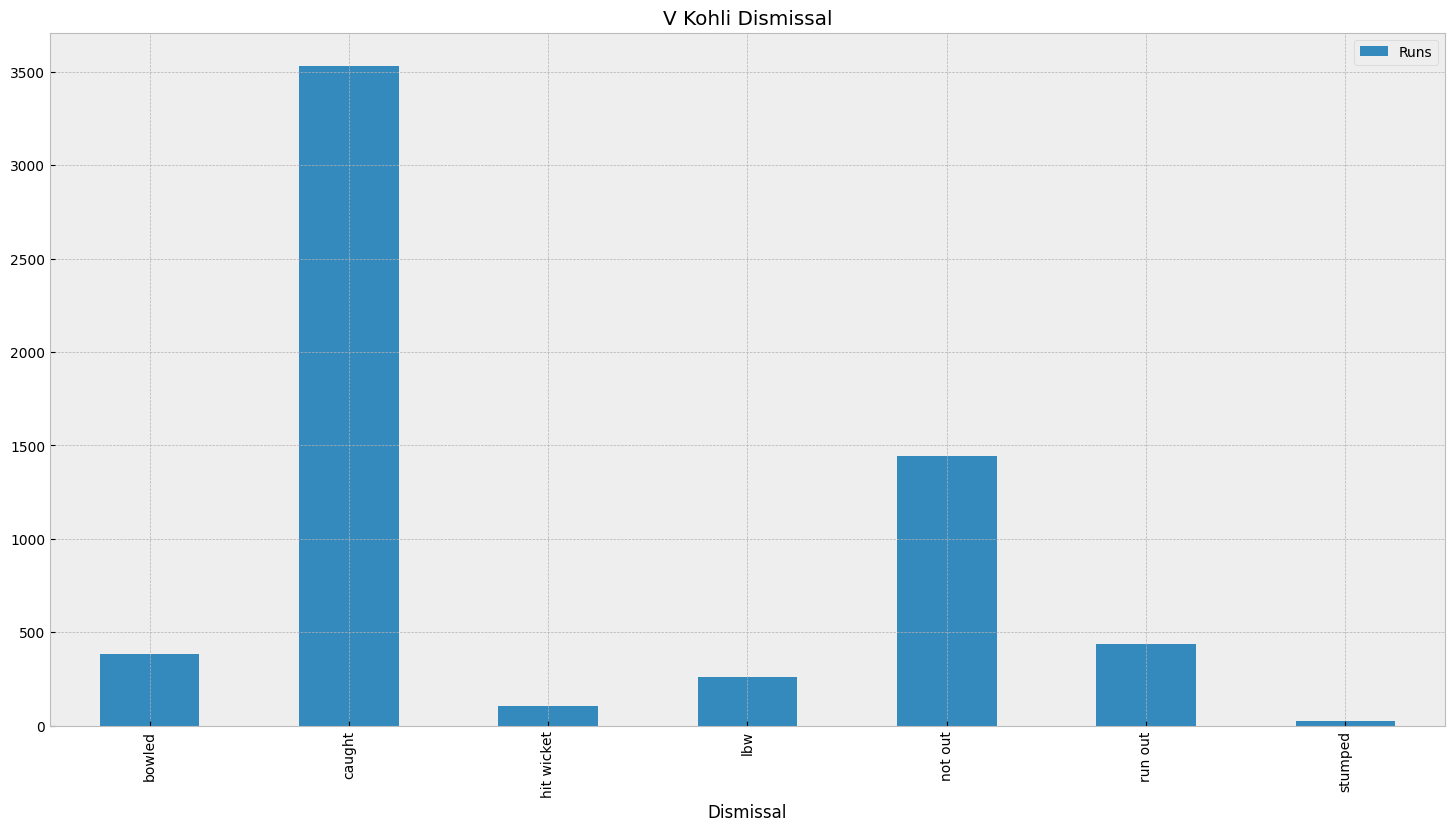

In [33]:
import matplotlib.style
import matplotlib.pyplot as plt


Dismissal_df = realData.groupby("Dismissal").sum()
Dismissal_df.plot(figsize = (18,9), kind = "bar", y = "Runs")


plt.title("V Kohli Dismissal")
plt.show()